In [30]:
import matplotlib.pyplot as plt
import seaborn as sns


sns.set(style="whitegrid")


In [31]:
import pandas as pd

df = pd.read_csv("../data/raw/fifa_players_raw.csv")
df.head()


,player,team,name,position,height,age,appearance,goals,assists,yellow cards,...,goals conceded,clean sheets,minutes played,days_injured,games_injured,award,current_value,highest_value,position_encoded,winger
0,/david-de-gea/profil/spieler/59377,Manchester United,David de Gea,Goalkeeper,189.0,32.0,104,0.000000,0.000000,0.009585,...,1.217252,0.335463,9390,42,5,13,15000000,70000000,1,0
1,/jack-butland/profil/spieler/128899,Manchester United,Jack Butland,Goalkeeper,196.0,30.0,15,0.000000,0.000000,0.069018,...,1.242331,0.207055,1304,510,58,1,1500000,22000000,1,0
2,/tom-heaton/profil/spieler/34130,Manchester United,Tom Heaton,Goalkeeper,188.0,37.0,4,0.000000,0.000000,0.000000,...,0.616438,0.924658,292,697,84,4,600000,6000000,1,0
3,/lisandro-martinez/profil/spieler/480762,Manchester United,Lisandro Martínez,Defender Centre-Back,175.0,25.0,82,0.028090,0.056180,0.224719,...,0.000000,0.000000,6408,175,22,9,50000000,50000000,2,0
4,/raphael-varane/profil/spieler/164770,Manchester United,Raphaël Varane,Defender Centre-Back,191.0,30.0,63,0.017889,0.017889,0.053667,...,0.000000,0.000000,5031,238,51,21,40000000,80000000,2,0


## Step 1: Load Data

We import the pandas library and load the FIFA players dataset into a DataFrame. 
This allows us to inspect and manipulate player statistics for analysis.


In [32]:
df.shape

(10754, 22)

In [33]:
df.columns

Index(['player', 'team', 'name', 'position', 'height', 'age', 'appearance',
       'goals', 'assists', 'yellow cards', 'second yellow cards', 'red cards',
       'goals conceded', 'clean sheets', 'minutes played', 'days_injured',
       'games_injured', 'award', 'current_value', 'highest_value',
       'position_encoded', 'winger'],
      dtype='object')

In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10754 entries, 0 to 10753
Data columns (total 22 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   player               10754 non-null  object 
 1   team                 10754 non-null  object 
 2   name                 10754 non-null  object 
 3   position             10754 non-null  object 
 4   height               10754 non-null  float64
 5   age                  10754 non-null  float64
 6   appearance           10754 non-null  int64  
 7   goals                10754 non-null  float64
 8   assists              10754 non-null  float64
 9   yellow cards         10754 non-null  float64
 10  second yellow cards  10754 non-null  float64
 11  red cards            10754 non-null  float64
 12  goals conceded       10754 non-null  float64
 13  clean sheets         10754 non-null  float64
 14  minutes played       10754 non-null  int64  
 15  days_injured         10754 non-null 

In [35]:
df.describe()

,height,age,appearance,goals,assists,yellow cards,second yellow cards,red cards,goals conceded,clean sheets,minutes played,days_injured,games_injured,award,current_value,highest_value,position_encoded,winger
count,10754.000000,10754.000000,10754.000000,10754.000000,10754.000000,10754.000000,10754.000000,10754.000000,10754.000000,10754.000000,10754.000000,10754.000000,10754.000000,10754.000000,1.075400e+04,1.075400e+04,10754.000000,10754.000000
mean,181.240353,26.041903,36.407011,0.125554,0.086978,0.189757,0.004666,0.006826,0.131655,0.044881,2470.789381,117.961689,15.826297,1.960759,3.622971e+06,6.152606e+06,2.713223,0.307513
std,6.969818,4.777629,26.526541,0.235585,0.143351,0.432388,0.025232,0.081143,0.442335,0.924437,2021.703271,175.206827,23.383606,3.743936,9.095410e+06,1.338988e+07,0.986356,0.461485
min,156.000000,15.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,1.000000,0.000000
25%,176.000000,22.000000,12.000000,0.000000,0.000000,0.053191,0.000000,0.000000,0.000000,0.000000,660.000000,0.000000,0.000000,0.000000,3.000000e+05,4.500000e+05,2.000000,0.000000
50%,181.240353,26.000000,35.000000,0.045969,0.040773,0.150250,0.000000,0.000000,0.000000,0.000000,2101.500000,37.000000,5.000000,1.000000,8.000000e+05,1.500000e+06,3.000000,0.000000
75%,186.000000,29.000000,59.000000,0.172263,0.133136,0.248276,0.000000,0.000000,0.000000,0.000000,3968.000000,181.000000,24.000000,2.000000,3.000000e+06,5.000000e+06,4.000000,1.000000
max,206.000000,43.000000,107.000000,11.250000,4.000000,30.000000,1.000000,6.923077,9.000000,90.000000,9510.000000,2349.000000,339.000000,92.000000,1.800000e+08,2.000000e+08,4.000000,1.000000


In [36]:
df.isnull().sum().sort_values(ascending=False)

player                 0
team                   0
position_encoded       0
highest_value          0
current_value          0
award                  0
games_injured          0
days_injured           0
minutes played         0
clean sheets           0
goals conceded         0
red cards              0
second yellow cards    0
yellow cards           0
assists                0
goals                  0
appearance             0
age                    0
height                 0
position               0
name                   0
winger                 0
dtype: int64

In [37]:
df.isnull().sum()

player                 0
team                   0
name                   0
position               0
height                 0
age                    0
appearance             0
goals                  0
assists                0
yellow cards           0
second yellow cards    0
red cards              0
goals conceded         0
clean sheets           0
minutes played         0
days_injured           0
games_injured          0
award                  0
current_value          0
highest_value          0
position_encoded       0
winger                 0
dtype: int64

In [38]:
df['current_value'] = df['current_value'].replace('[€,]', '', regex=True).astype(float)

In [39]:
df = df.drop_duplicates()

In [40]:
df['name'] = df['name'].str.strip()
df['team'] = df['team'].str.strip()
df['position'] = df['position'].str.strip()

## Step 3: Clean Data

- Removed duplicate rows to ensure unique players.
- Stripped extra spaces from text columns (name, team, position) for accurate grouping.
- Converted age to integers and current_value to numeric for calculations.
- These steps ensure the dataset is ready for feature engineering and analysis.

In [41]:
df['goals_per_appearance'] = df['goals'] / df['appearance']

In [42]:
df['assists_per_appearance'] = df['assists'] / df['appearance']

In [43]:
df['yellow_per_appearance'] = df['yellow cards'] / df['appearance']

In [44]:
df['total_contrib_per_appearance'] = df['goals_per_appearance'] + df['assists_per_appearance']

## Step 4: Feature Engineering

New columns created:
- `goals_per_appearance`: efficiency of scoring goals
- `assists_per_appearance`: efficiency of providing assists
- `yellow_per_appearance`: discipline metric per game
- `total_contrib_per_appearance`: combined contribution metric

These features allow us to compare players fairly, normalized by playing time.

In [45]:
df.to_csv("../data/cleaned/fifa_players_cleaned.csv", index=False)

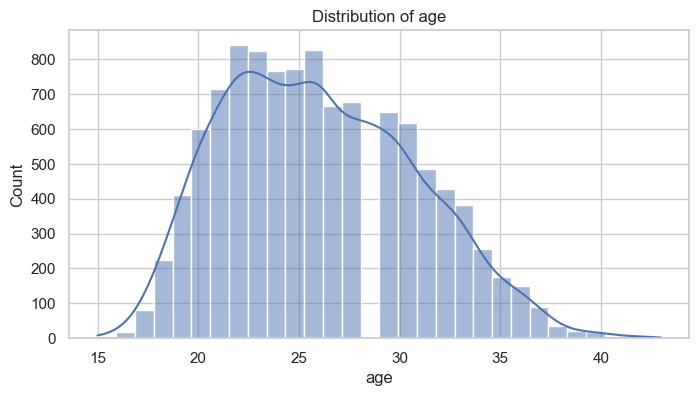

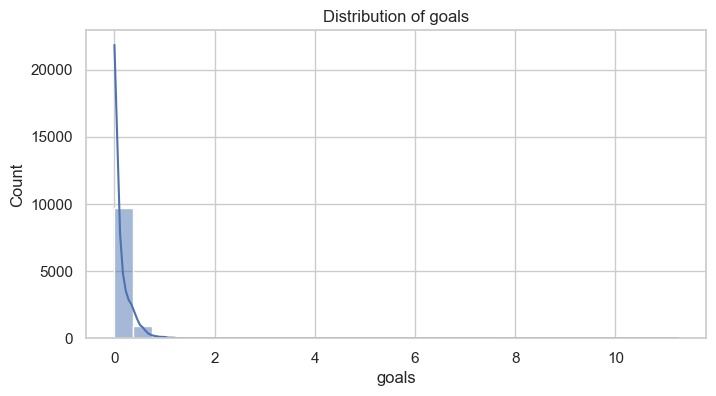

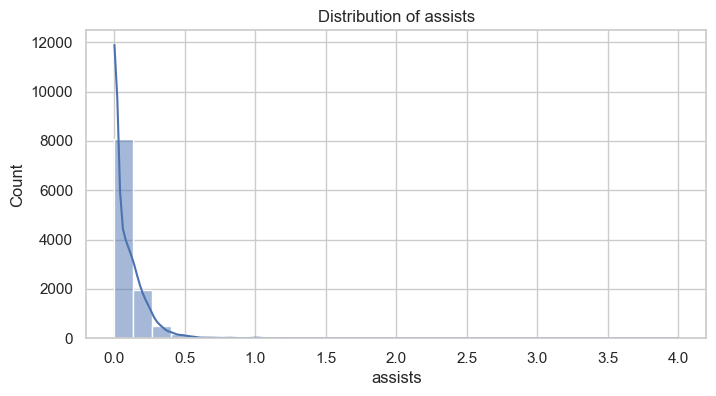

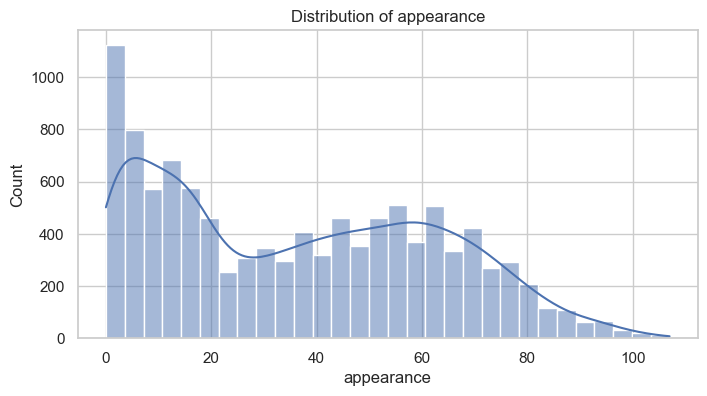

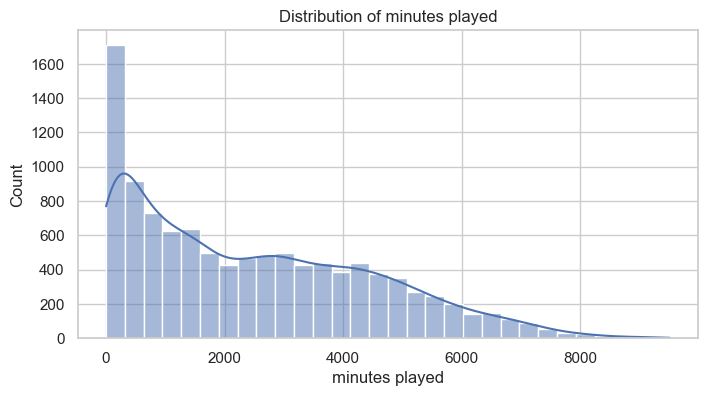

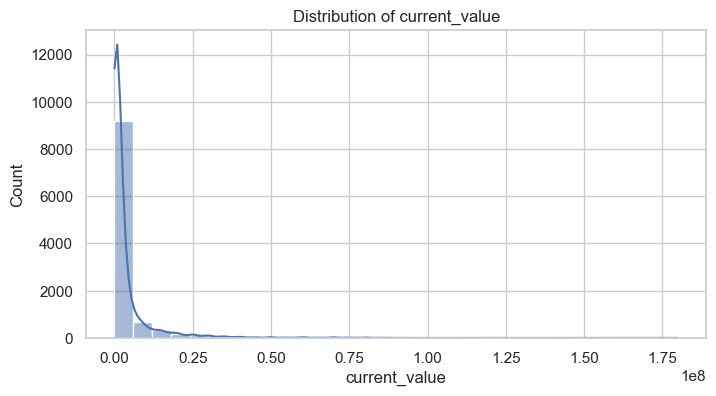

In [46]:
numeric_cols = ['age', 'goals', 'assists', 'appearance', 'minutes played', 'current_value']

for col in numeric_cols:
    plt.figure(figsize=(8,4))
    sns.histplot(df[col], bins=30, kde=True)
    plt.title(f'Distribution of {col}')
    plt.show()

## Distribution of Numeric Features

We visualize distributions of age, goals, assists, appearances, minutes played, and current value. 
This helps us detect outliers, skewness, and overall patterns in the data.

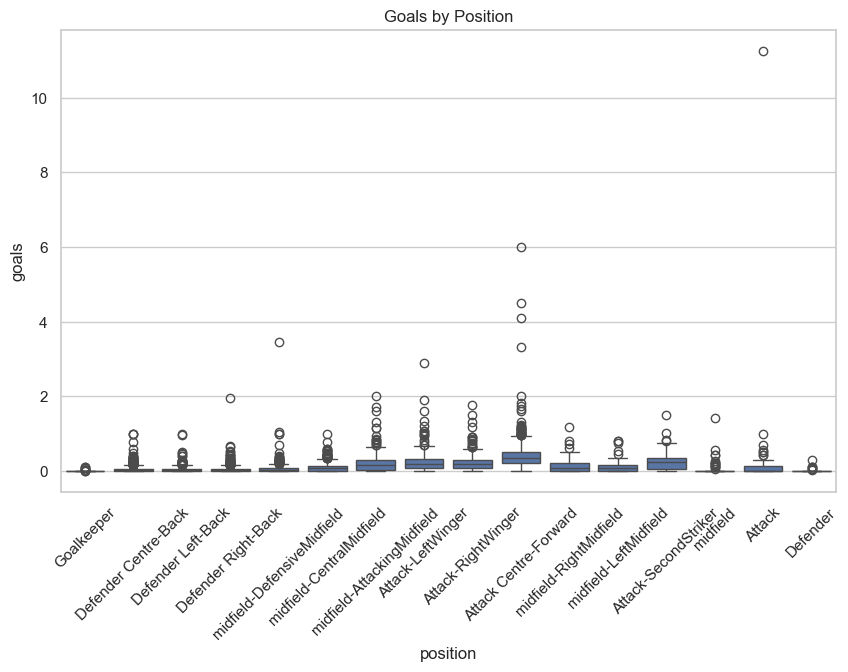

In [47]:
plt.figure(figsize=(10,6))
sns.boxplot(x='position', y='goals', data=df)
plt.title('Goals by Position')
plt.xticks(rotation=45)
plt.show()

## Goals by Position

A boxplot is used to compare goals across different positions. 
This helps identify which positions are most effective at scoring and spot exceptional performers.

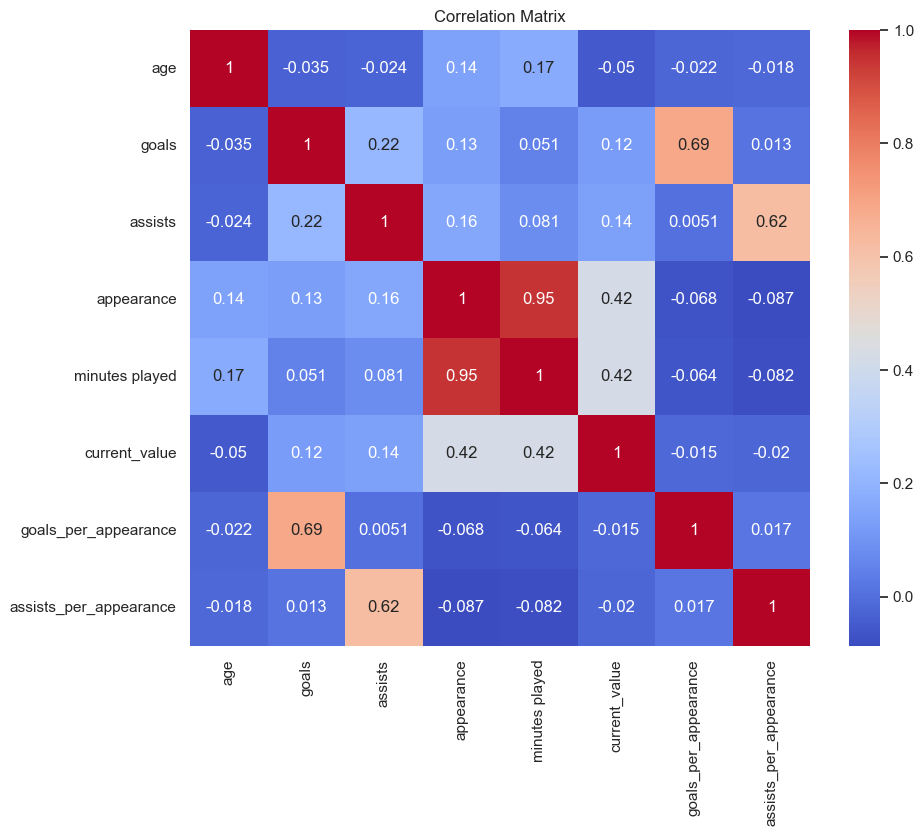

In [48]:
plt.figure(figsize=(10,8))
corr = df[['age','goals','assists','appearance','minutes played','current_value','goals_per_appearance','assists_per_appearance']].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

## Correlation Analysis

Heatmap shows correlations between numeric features.
- Strong correlations may indicate relationships worth investigating.
- For example, goals_per_appearance may correlate with total contribution and current value.

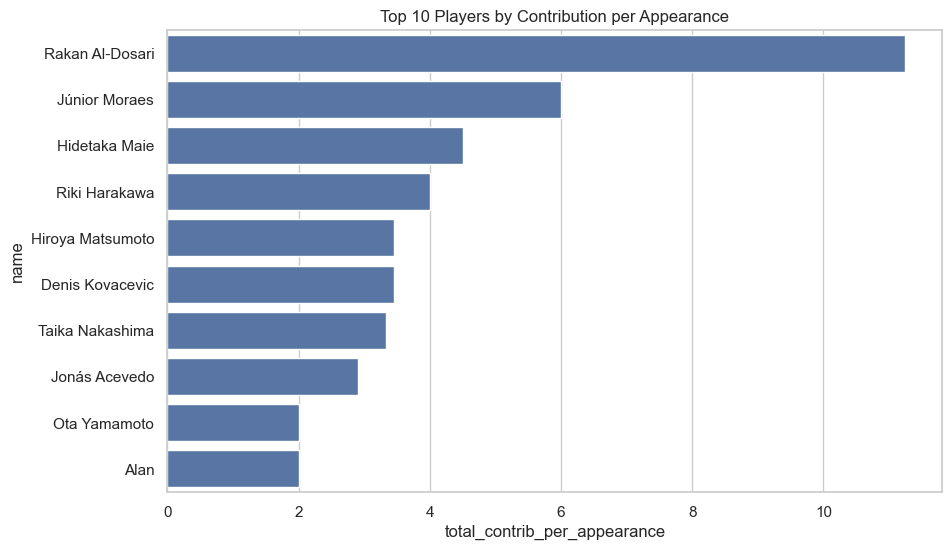

In [49]:
top_players = df.sort_values('total_contrib_per_appearance', ascending=False).head(10)
plt.figure(figsize=(10,6))
sns.barplot(x='total_contrib_per_appearance', y='name', data=top_players)
plt.title('Top 10 Players by Contribution per Appearance')
plt.show()

## Top 10 Players by Total Contribution

Shows the most efficient players based on combined goals and assists per appearance.
This highlights standout performers in the league.

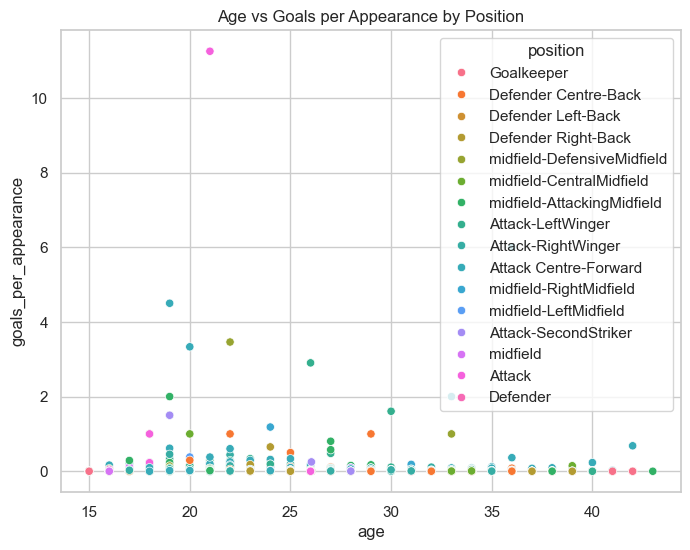

In [50]:
plt.figure(figsize=(8,6))
sns.scatterplot(x='age', y='goals_per_appearance', hue='position', data=df)
plt.title('Age vs Goals per Appearance by Position')
plt.show()

## Age vs Goals per Appearance by Position

Scatter plot explores how player efficiency varies with age and position.
- Helps identify trends such as younger players being more efficient or position-specific performance patterns.

## Key Insights

- Forwards generally score the most goals, while midfielders excel in assists.
- Older players show slightly lower goals per appearance, but some still perform exceptionally.
- Total contribution correlates moderately with player value, suggesting value aligns with efficiency.
- Feature engineering like per-appearance metrics is crucial for fair comparison.

## Project Summary

This analysis explores FIFA player performance using data on goals, assists, appearances, age, position, and market value. 
Key steps included:

1. Loading and inspecting the dataset
2. Cleaning and formatting text/numeric data
3. Feature engineering to calculate per-appearance metrics
4. Exploratory data analysis using histograms, boxplots, scatterplots, and correlation heatmaps
5. Identifying trends, top performers, and relationships between efficiency, age, position, and market value

This project demonstrates skills in:
- Data cleaning and preprocessing
- Feature engineering
- Exploratory data analysis (EDA)
- Data visualization with Matplotlib and Seaborn
- Communicating insights through Markdown documentation